In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from GeoConformalizedExplainer import GeoConformalizedExplainer

C:\Users\Xiayin\miniconda3\envs\UncertaintyGeoXAI\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('../data/seattle_sample_3k.csv')

In [3]:
data = gpd.GeoDataFrame(data, crs="EPSG:32610", geometry=gpd.points_from_xy(x=data.UTM_X, y=data.UTM_Y))

In [4]:
data = data.to_crs(4326)

In [5]:
data['lon'] = data['geometry'].get_coordinates()['x']

In [6]:
data['lat'] = data['geometry'].get_coordinates()['y']

In [7]:
data['price'] = np.power(10, data['log_price']) / 10000

In [8]:
y = data.price
X = data[['bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'condition', 'waterfront', 'view', 'age', 'lon', 'lat']]
loc = data[['lon', 'lat']]

In [9]:
X_train, X_temp, y_train, y_temp, loc_train, loc_temp = train_test_split(X, y, loc, train_size=0.8, random_state=42)

In [10]:
X_calib, X_test, y_calib, y_test, loc_calib, loc_test = train_test_split(X_temp, y_temp, loc_temp, train_size=0.5, random_state=42)

In [11]:
model = xgb.XGBRegressor(n_estimators=500, max_depth=3, min_child_weight=1.0, colsample_bytree=1.0)

In [12]:
model.fit(X_train.values, y_train.values)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
feature_names = X_train.columns

In [14]:
explainer = GeoConformalizedExplainer(prediction_f=model.predict,
                                      x_train=X_train,
                                      x_calib=X_calib,
                                      coord_calib=loc_calib.values,
                                      miscoverage_level=0.1,
                                      band_width=0.15,
                                      feature_names=feature_names)

In [15]:
results = explainer.uncertainty_aware_explain(x_test=X_test, coord_test=loc_test)

Training SHAP


100%|██████████| 2400/2400 [19:47<00:00,  2.02it/s]


Calibrating SHAP


100%|██████████| 300/300 [02:41<00:00,  1.86it/s]


Testing SHAP


100%|██████████| 300/300 [04:07<00:00,  1.21it/s]


Explaining Variables


In [16]:
results.accuracy_summary()

,coverage_probability,R2,RMSE,SHAP_Var,Pred_SHAP_Var
bathrooms,0.926667,0.408543,1.628396,4.483291,1.332560
sqft_living,0.933333,0.924274,2.621557,90.755139,80.601242
sqft_lot,0.883333,0.809271,1.984379,20.645870,18.451328
grade,0.970000,0.977819,1.546861,107.876885,97.506694
condition,0.903333,0.839473,0.662681,2.735647,2.809271
waterfront,0.950000,0.936918,1.243138,24.498211,20.851803
view,0.856667,0.869896,1.960238,29.534360,15.836213
age,0.866667,0.591565,2.035647,10.145709,8.202280
lon,0.913333,0.649445,2.488230,17.661366,13.205584
lat,0.983333,0.972968,2.565771,243.532290,232.337573


In [17]:
results.accuracy_summary().to_csv('./SeattleHomeSale_accuracy_summary.csv')

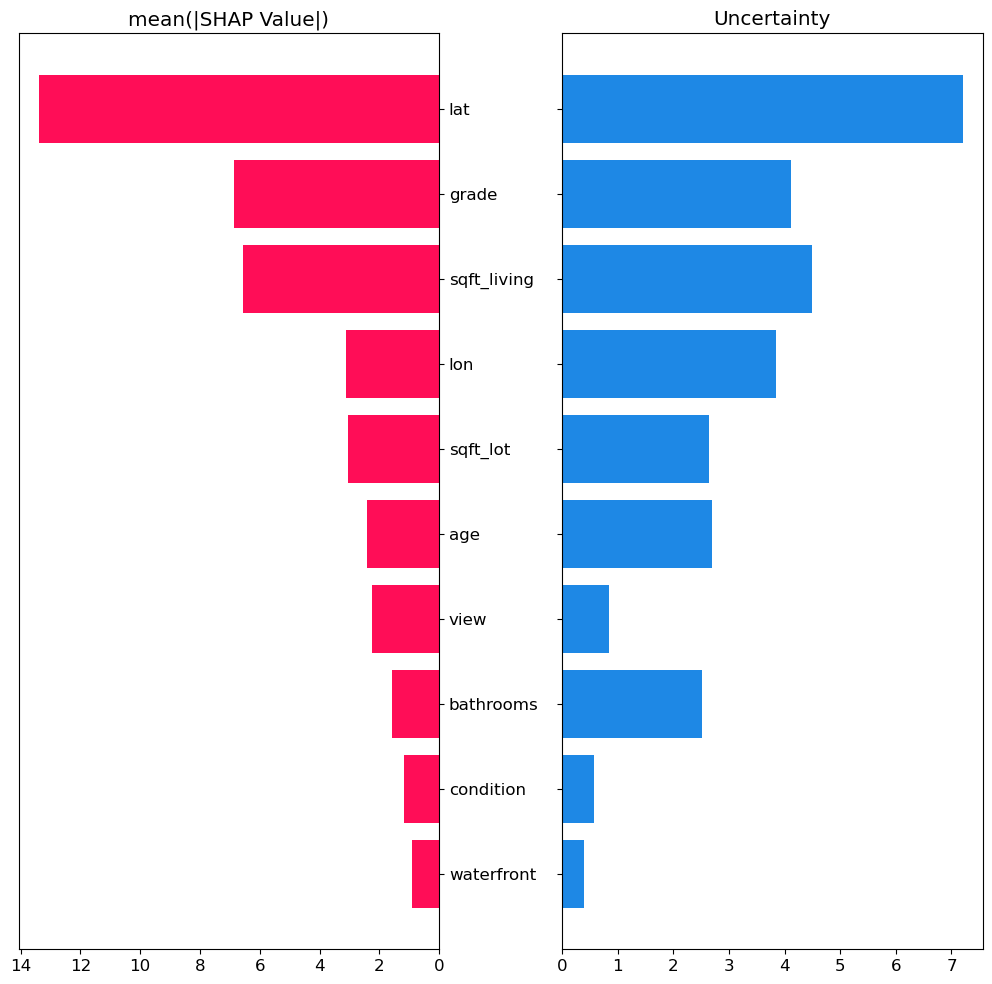

In [18]:
results.plot_absolute_shap_value_with_uncertainty(filename='./SeattleHomeSale_absolute_shap_value_with_uncertainty.pdf')

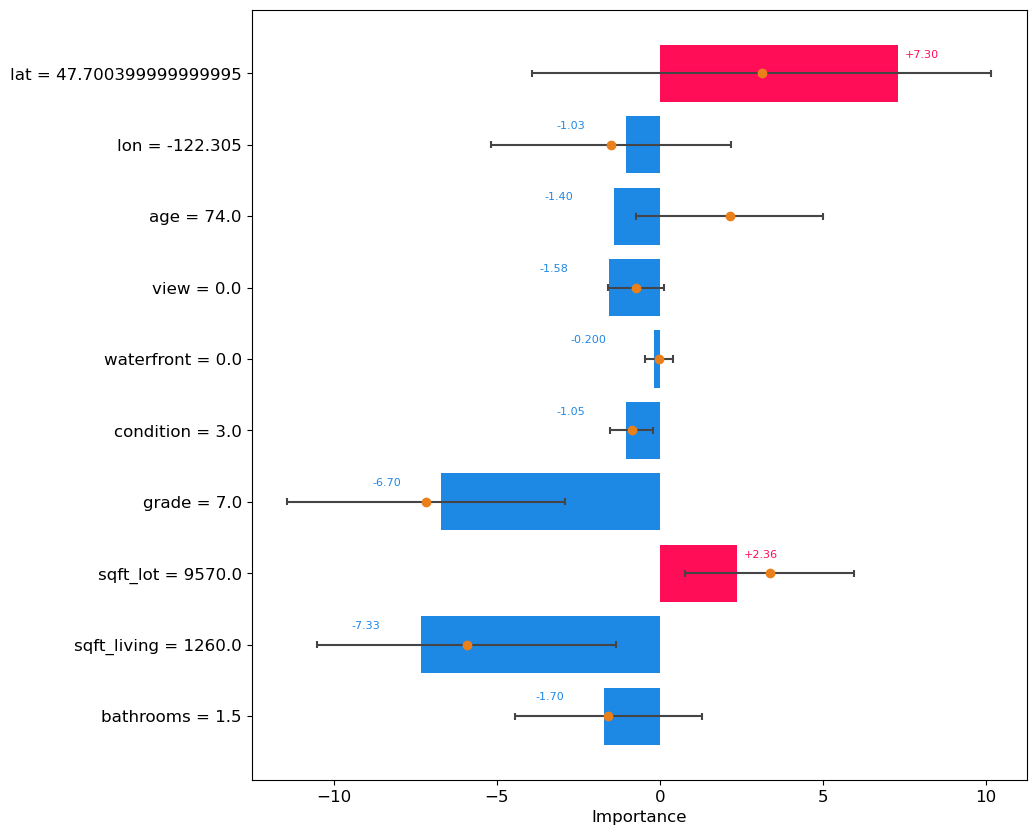

In [19]:
results.plot_shap_values_with_uncertainty(20, filename='./SeattleHomeSale_shap_values_with_uncertainty.pdf')

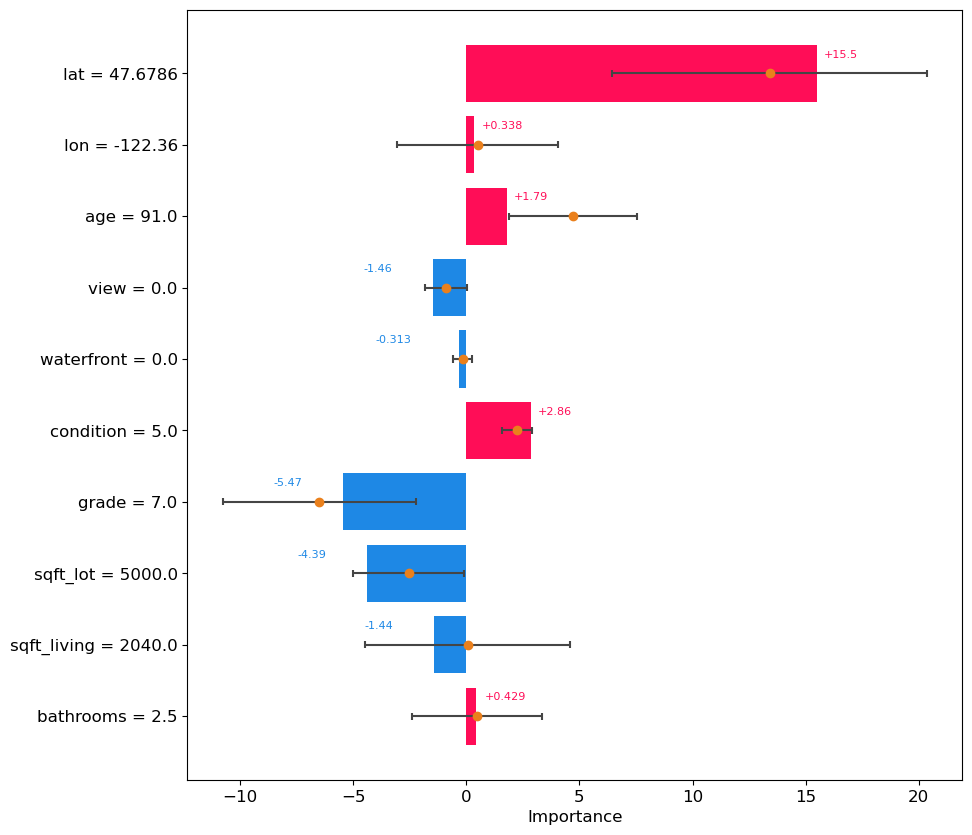

In [20]:
results.plot_shap_values_with_uncertainty(40)

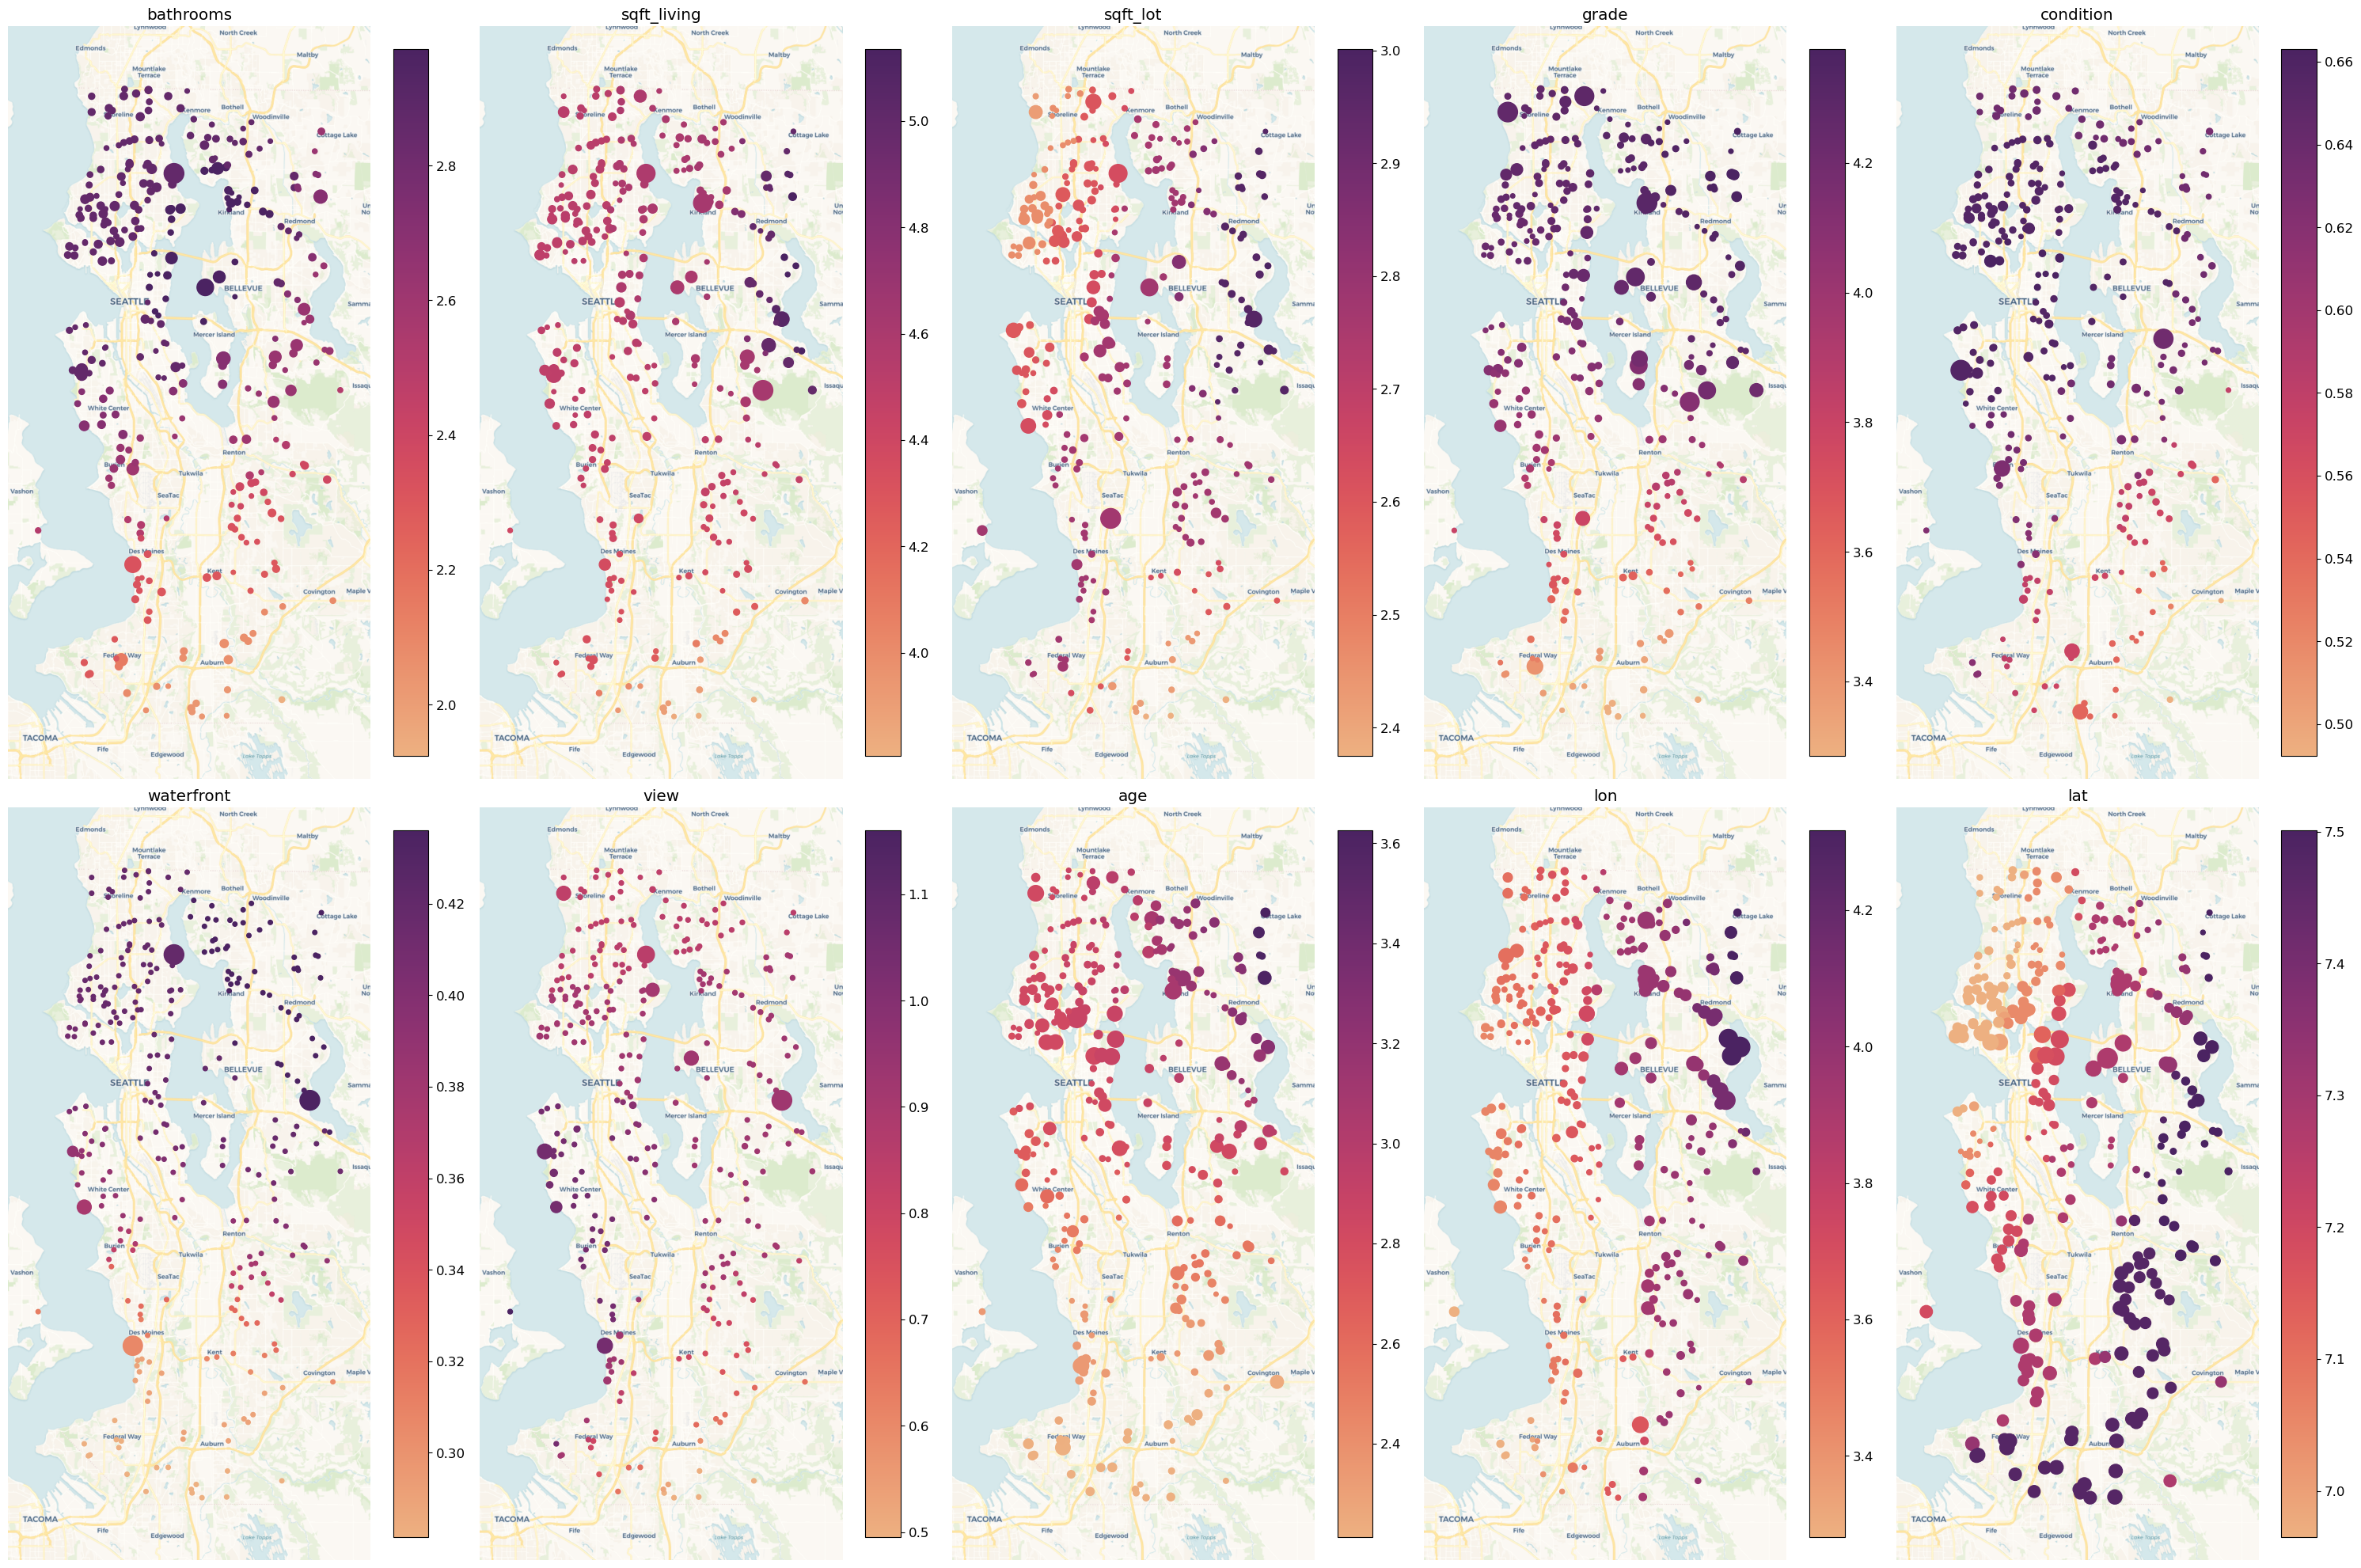

In [21]:
results.plot_geo_uncertainty(figsize=[30, 40], shrink=0.3, s_limits=(4, 18), cmap='flare', filename='./SeattleHomeSale_geo_uncertainty.pdf')

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00

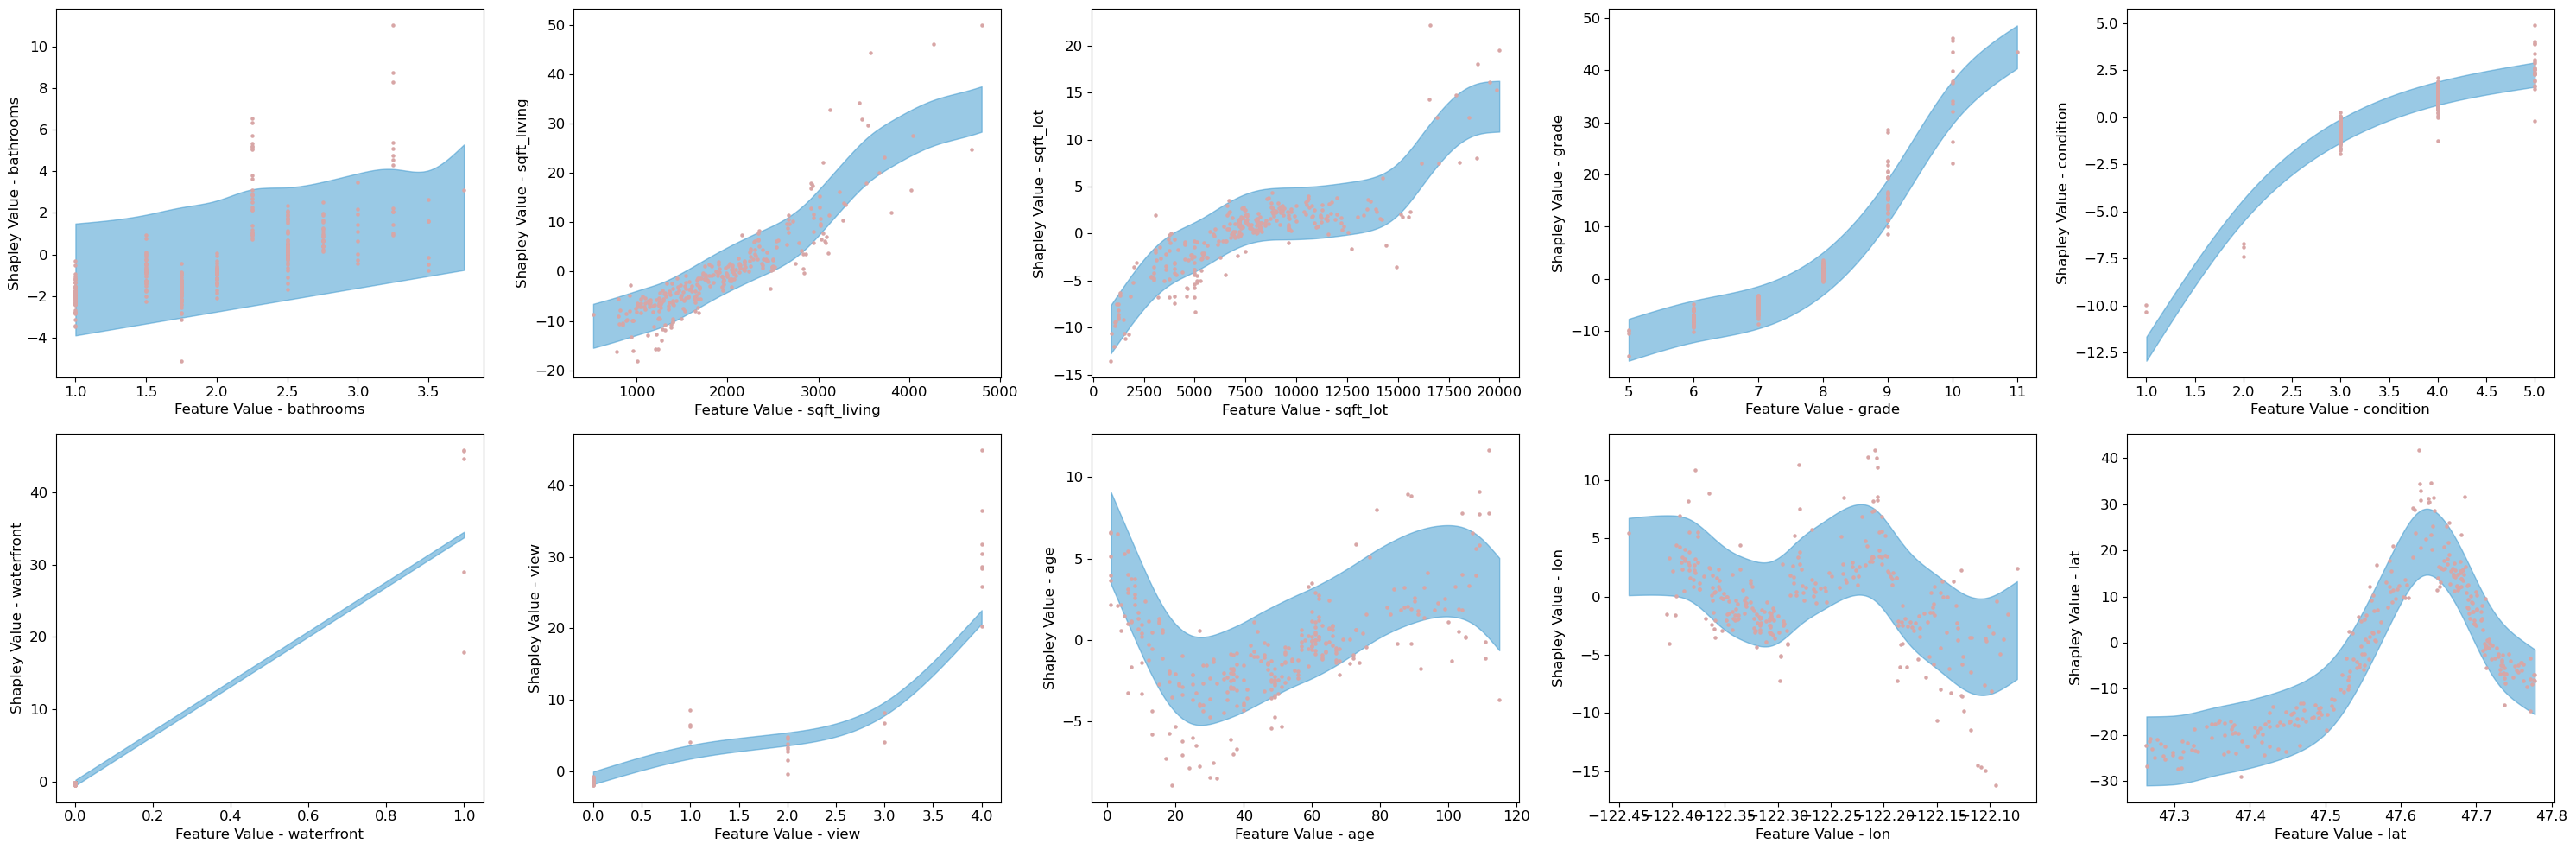

In [22]:
results.plot_partial_dependence_with_fitted_bounds(figsize=[30, 10], filename='SeattleHomeSale_partial_dependence_with_fitted_bounds.pdf')

In [25]:
np.save('./seattle_house_price.npy', results.explanation_values)

In [23]:
import matplotlib.pyplot as plt
import geoplot as gplt
import geoplot.crs as gcrs
import contextily as cx

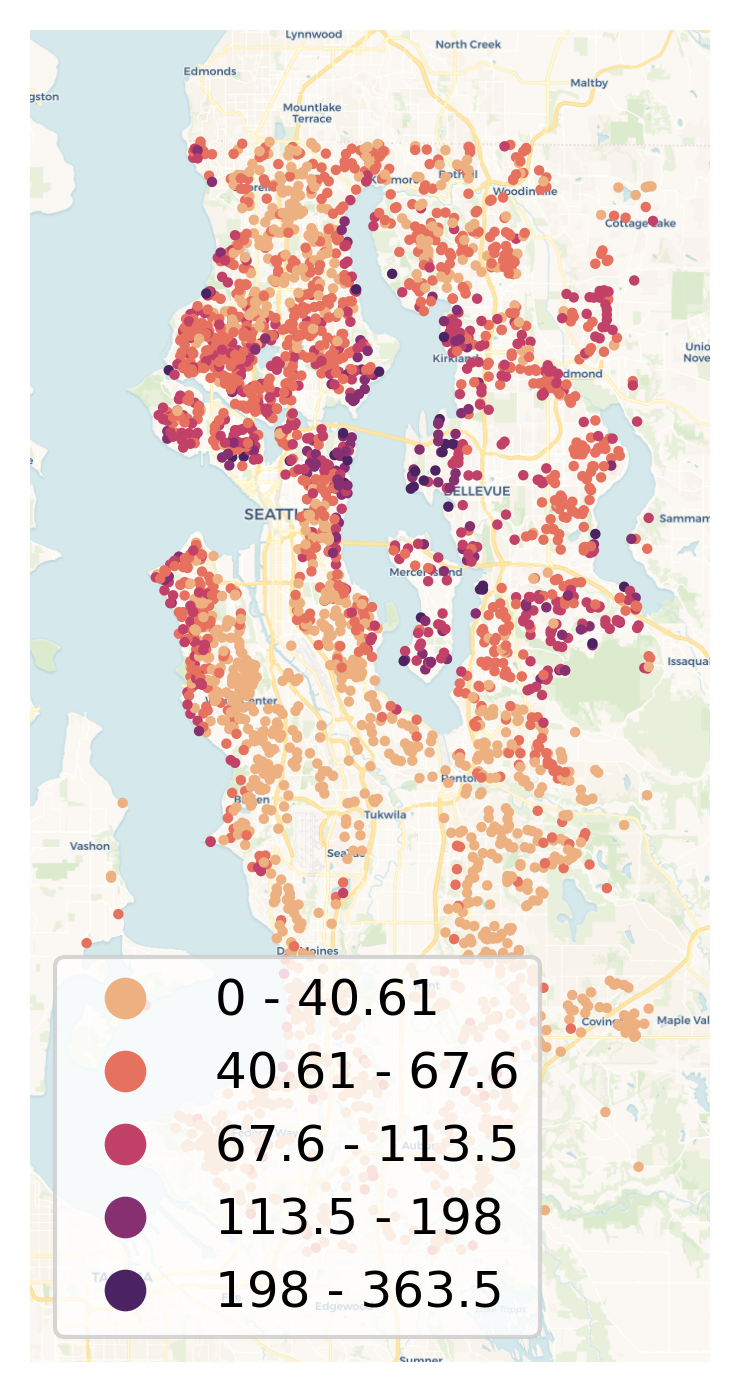

In [24]:
utm = gcrs.WebMercator()

fig, ax = plt.subplots(dpi=300, subplot_kw={'projection': utm})

gplt.webmap(data, projection=utm, provider=cx.providers.CartoDB.Voyager, ax=ax)
gplt.pointplot(data, hue='price', cmap='flare', legend=True, s=1.5, ax=ax, scheme='NaturalBreaks')

plt.tight_layout()
plt.savefig('./seattle_home_sale_price_distribution_natural_breaks.pdf')
plt.show()